# kNN на mnist

In [1]:
from nearest_neighbors import KNNClassifier
import cross_validation

In [2]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.sparse import *
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from sklearn.metrics import confusion_matrix
import itertools
from scipy.ndimage import interpolation
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rotate

In [3]:
mnist_dataset = fetch_mldata('MNIST original')

In [4]:
X_train = mnist_dataset.data[:60000]
X_test = mnist_dataset.data[60000:]
y_train = mnist_dataset.target[:60000]
y_test = mnist_dataset.target[60000:]

### Эксперимент 1
#### Параметры:
- Количество ближайших соседей: 5
- Метртика: евклидова
- Количество признаков: 10, 20, 100
- Стратегия: my own, brute, kd-tree, ball-tree

#### Измерить время работы

In [5]:
my_own = KNNClassifier(k=5, strategy='my_own', metric='euclidean', weights=False)
brute = KNNClassifier(k=5, strategy='brute', metric='euclidean', weights=False)
kd_tree = KNNClassifier(k=5, strategy='kd_tree', metric='euclidean', weights=False)
ball_tree = KNNClassifier(k=5, strategy='ball_tree', metric='euclidean', weights=False)

In [6]:
feature_numbers = np.arange(28 * 28)
np.random.shuffle(feature_numbers)

In [7]:
my_own.fit(X_train[:, feature_numbers[:10]], y_train)
brute.fit(X_train[:, feature_numbers[:10]], y_train)
kd_tree.fit(X_train[:, feature_numbers[:10]], y_train)
ball_tree.fit(X_train[:, feature_numbers[:10]], y_train)

#### Запустим все реализации для 10 признаков

In [8]:
%%time
my_own.predict(X_test[:, feature_numbers[:10]])

CPU times: user 775 ms, sys: 144 ms, total: 918 ms
Wall time: 29.1 s


array([0, 0, 0, ..., 0, 0, 0])

In [9]:
%%time
brute.predict(X_test[:, feature_numbers[:10]])

CPU times: user 25.3 s, sys: 16.3 s, total: 41.5 s
Wall time: 1min 8s


array([7, 0, 2, ..., 2, 1, 6])

In [10]:
%%time
kd_tree.predict(X_test[:, feature_numbers[:10]])

CPU times: user 4.1 s, sys: 42.8 ms, total: 4.14 s
Wall time: 2.29 s


array([7, 0, 2, ..., 2, 1, 6])

In [11]:
%%time
ball_tree.predict(X_test[:, feature_numbers[:10]])

CPU times: user 28 s, sys: 32.2 ms, total: 28 s
Wall time: 9.93 s


array([7, 0, 2, ..., 2, 1, 6])

#### Заново обучим и запустим все реализации для 20 признаков

In [12]:
my_own.fit(X_train[:, feature_numbers[:20]], y_train)
brute.fit(X_train[:, feature_numbers[:20]], y_train)
kd_tree.fit(X_train[:, feature_numbers[:20]], y_train)
ball_tree.fit(X_train[:, feature_numbers[:20]], y_train)

In [13]:
%%time
my_own.predict(X_test[:, feature_numbers[:20]])

CPU times: user 38.2 s, sys: 11.9 s, total: 50.1 s
Wall time: 34.9 s


array([0, 8, 2, ..., 9, 1, 6])

In [14]:
%%time
brute.predict(X_test[:, feature_numbers[:20]])

CPU times: user 24.5 s, sys: 16.3 s, total: 40.8 s
Wall time: 1min 6s


array([0, 8, 2, ..., 9, 1, 6])

In [15]:
%%time
kd_tree.predict(X_test[:, feature_numbers[:20]])

CPU times: user 13.3 s, sys: 37.9 ms, total: 13.3 s
Wall time: 5.09 s


array([0, 8, 2, ..., 9, 1, 6])

In [16]:
%%time
ball_tree.predict(X_test[:, feature_numbers[:20]])

CPU times: user 1min 49s, sys: 0 ns, total: 1min 49s
Wall time: 32.5 s


array([0, 8, 2, ..., 9, 1, 6])

#### Заново обучим и запустим все реализации для 100 признаков

In [17]:
my_own.fit(X_train[:, feature_numbers[:100]], y_train)
brute.fit(X_train[:, feature_numbers[:100]], y_train)
kd_tree.fit(X_train[:, feature_numbers[:100]], y_train)
ball_tree.fit(X_train[:, feature_numbers[:100]], y_train)

In [18]:
%%time
my_own.predict(X_test[:, feature_numbers[:100]])

CPU times: user 1min 8s, sys: 14.8 s, total: 1min 22s
Wall time: 44.9 s


array([7, 8, 6, ..., 9, 1, 6])

In [19]:
%%time
brute.predict(X_test[:, feature_numbers[:100]])

CPU times: user 27.4 s, sys: 18.1 s, total: 45.5 s
Wall time: 1min 18s


array([7, 8, 6, ..., 9, 1, 6])

In [20]:
%%time
kd_tree.predict(X_test[:, feature_numbers[:100]])

CPU times: user 5min 47s, sys: 726 ms, total: 5min 48s
Wall time: 1min 52s


array([7, 8, 6, ..., 9, 1, 6])

In [21]:
%%time
ball_tree.predict(X_test[:, feature_numbers[:100]])

CPU times: user 6min 33s, sys: 997 ms, total: 6min 34s
Wall time: 2min 14s


array([7, 8, 6, ..., 9, 1, 6])

#### Выводы:
- видно, что при малом числе признаков (10, 20) kd-tree и ball-tree работают существенно быстрее, чем brute и my own.
- на малом числе признаков ball-tree работал примерно в 3-5 раз дольше
- как только размерность пространства достаточно большая (100 признаков) kd-tree и ball-tree работают примерно одинаково и долго даже по сравнению с brute
- моя реализация постоянно была лучше brute

### Эксперимент 2
#### Параметры:
- Количество разбиений: 3
- Метртика: евклидова, косинусная
- Количество соседей: от 1 до 10
- Взвешивание: нет

#### Измерить:
- качество на кросс-валидации
- время работы (вне зависимости от k)

#### Время работы для евклидовой метрики:

In [5]:
%%time
cv = cross_validation.kfold(X_train.shape[0], n_folds=3)
score_eucl = cross_validation.knn_cross_val_score(X=X_train, y=y_train, k_list=np.arange(10) + 1, cv=cv,
                                                  strategy='my_own', metric='euclidean', weights=False)

CPU times: user 22min 29s, sys: 3min 11s, total: 25min 40s
Wall time: 9min 32s


#### Время работы для косинусной метрики:

In [6]:
%%time
score_cos = cross_validation.knn_cross_val_score(X=X_train, y=y_train, k_list=np.arange(10) + 1, cv=cv,
                                                 strategy='my_own', metric='cosine', weights=False)

CPU times: user 23min 1s, sys: 2min 16s, total: 25min 17s
Wall time: 8min 29s


#### Среднее качество на 3 фолдах:

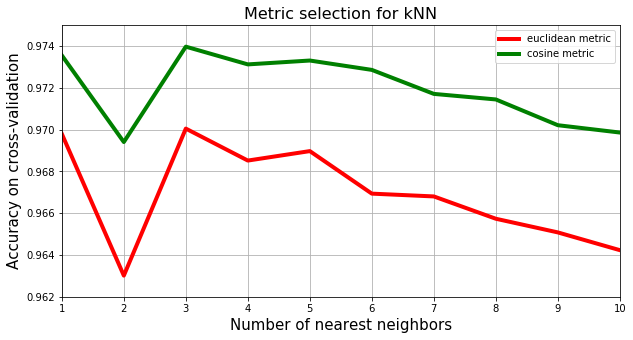

In [8]:
eucl_accuracy = np.array(DataFrame(score_eucl).mean(axis=0))
cos_accuracy = np.array(DataFrame(score_cos).mean(axis=0))
k = np.arange(10) + 1

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(k, eucl_accuracy, 'r', label='euclidean metric', linewidth=4)
plt.plot(k, cos_accuracy, 'g', label='cosine metric', linewidth=4)
plt.axis([1, 10, 0.962, 0.975])
plt.grid()

plt.xlabel('Number of nearest neighbors', fontsize=15)
plt.ylabel('Accuracy on cross-validation', fontsize=15)
plt.title('Metric selection for kNN', fontsize=16)

plt.legend()
plt.savefig('exp2.pdf')
plt.show()

#### Выводы:
- Время работы для косинусной метрики меньше, чем для евклидовой, хотя и не сильно
- Косинусная метрика даёт чуть-чуть лучшую accuracy, чем евклидова
- Вне зависимости от метрики оптимальные k = 1 и k = 3
- Самый оптимальный вариант k = 3 в комбинации с косинусной метрикой

### Эксперимент 3
#### Параметры:
- Количество разбиений: 3
- Метртика: евклидова, косинусная
- Количество соседей: от 1 до 10
- Взвешивание: да, нет

#### Сравнить взвешенный метод с методом без учёта весов соседей

In [9]:
cv = cross_validation.kfold(X_train.shape[0], n_folds=3)
score_eucl_weighted = cross_validation.knn_cross_val_score(X=X_train, y=y_train, k_list=np.arange(10) + 1, cv=cv,
                                                           strategy='my_own', metric='euclidean', weights=True)

In [10]:
cv = cross_validation.kfold(X_train.shape[0], n_folds=3)
score_cos_weighted = cross_validation.knn_cross_val_score(X=X_train, y=y_train, k_list=np.arange(10) + 1, cv=cv,
                                                          strategy='my_own', metric='cosine', weights=True)

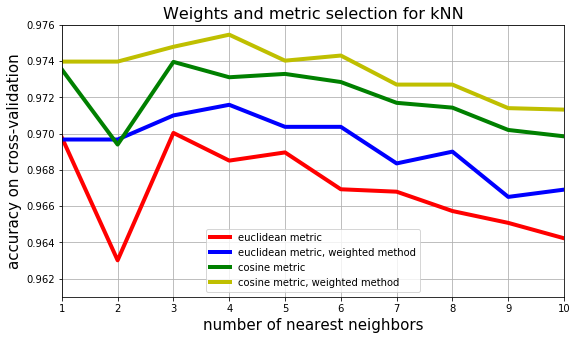

In [11]:
eucl_accuracy = np.array(DataFrame(score_eucl).mean(axis=0))
eucl_accuracy_weighted = np.array(DataFrame(score_eucl_weighted).mean(axis=0))
cos_accuracy = np.array(DataFrame(score_cos).mean(axis=0))
cos_accuracy_weighted = np.array(DataFrame(score_cos_weighted).mean(axis=0))

k = np.arange(10) + 1

fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(5)

plt.plot(k, eucl_accuracy, 'r', label='euclidean metric', linewidth=4)
plt.plot(k, eucl_accuracy_weighted, 'b', label='euclidean metric, weighted method', linewidth=4)
plt.plot(k, cos_accuracy, 'g', label='cosine metric', linewidth=4)
plt.plot(k, cos_accuracy_weighted, 'y', label='cosine metric, weighted method', linewidth=4)
plt.axis([1, 10, 0.961, 0.976])
plt.legend()

plt.xlabel('number of nearest neighbors', fontsize=15)
plt.ylabel('accuracy on cross-validation', fontsize=15)
plt.title('Weights and metric selection for kNN', fontsize=16)
plt.grid(True)
plt.savefig('exp3.pdf')
plt.show()

#### Выводы:
- Самый оптимальный набор параметров на кросс-валидации: k = 4, косинусная метрика, взвешенный метод

### Эксперимент 4

In [12]:
my_own = KNNClassifier(k=4, strategy='my_own', weights=True, metric='cosine')
my_own.fit(X_train, y_train)
y_predicted = my_own.predict(X_test)
test_accuracy = np.sum(y_predicted == y_test) / y_test.size

#### Качество на отложенном test

In [13]:
test_accuracy

0.97519999999999996

#### Качество на кросс-валидации

In [14]:
cos_accuracy_weighted[3]

0.97546559158308932

#### По сравнению с результатами http://yann.lecun.com/exdb/mnist/ моя реализация обошла
- K-nearest-neighbors, Euclidean (L2), error = 5.0, LeCun et al. 1998
- K-nearest-neighbors, Euclidean (L2), error = 3.09, Kenneth Wilder, U. Chicago
- K-nearest-neighbors, L3, error = 2.83, Kenneth Wilder, U. Chicago
- K-nearest-neighbors, Euclidean (L2) with deskewing, error = 2.4, LeCun et al. 1998

#### и далека от лучших реализаций с ошибкой меньше 1%

In [15]:
error = (1 - test_accuracy) * 100
error

2.4800000000000044

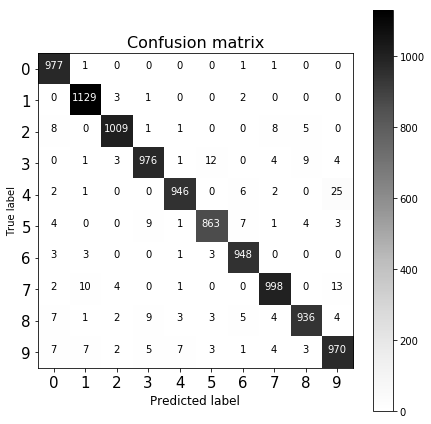

In [21]:
cnf_matrix = confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

plt.imshow(cnf_matrix, interpolation='nearest', cmap='Greys')
plt.title('Confusion matrix', fontsize=16)
plt.colorbar()

plt.xticks(np.linspace(0, 9, 10), fontsize=15)
plt.yticks(np.linspace(0, 9, 10), fontsize=15)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(np.arange(cnf_matrix.shape[0]), np.arange(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label')

plt.savefig('conf_matrix.pdf')
plt.show()

#### Шаблон для confusion matrix взят отсюда http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [35]:
def vis_digit(digit):
    plt.imshow(digit.reshape((28, 28)), cmap='Greys')

In [33]:
mask1 = (y_test == 4) * (y_predicted == 9)

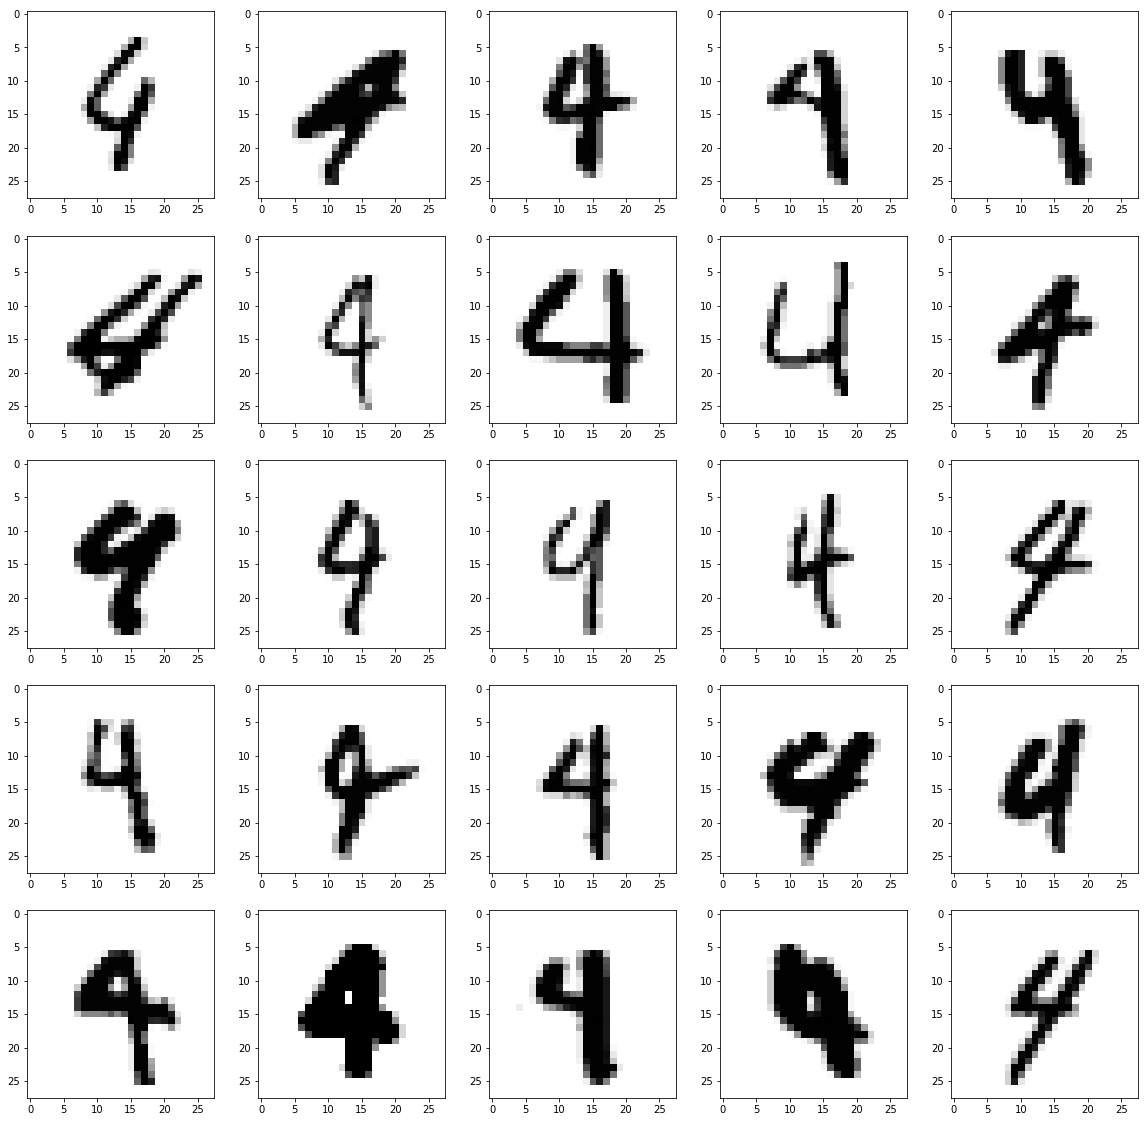

In [79]:
num_of_digits = 25
fig, ax = plt.subplots(5, 5, figsize=(25, 5))

for i in range(num_of_digits):
    ax[i // 5, i % 5].imshow(X_test[mask1][i].reshape((28, 28)), cmap='Greys')

fig.set_figwidth(20)
fig.set_figheight(20)

plt.savefig('digits_1.pdf')
plt.show()

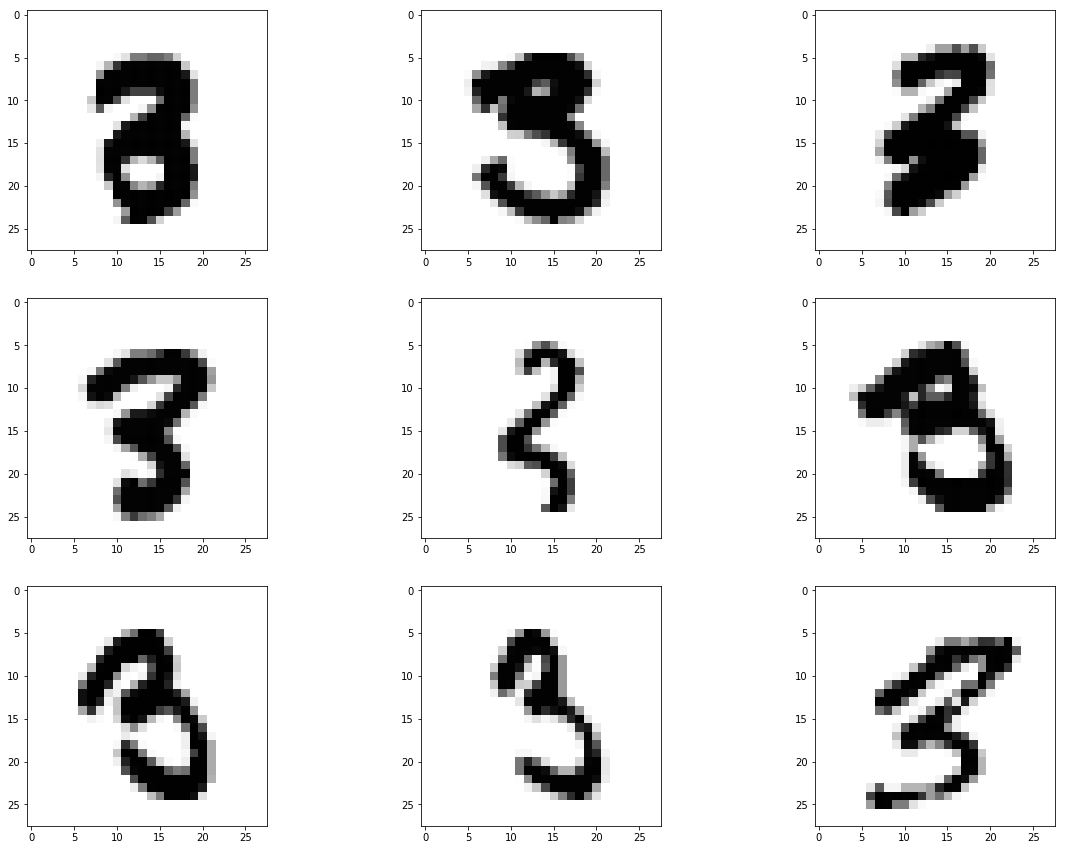

In [78]:
mask = (y_test == 3) * (y_predicted == 8)
num_of_digits = np.sum(mask)
fig, ax = plt.subplots(3, 3, figsize=(25, 5))

for i in range(num_of_digits):
    ax[i // 3, i % 3].imshow(X_test[mask][i].reshape((28, 28)), cmap='Greys')

fig.set_figwidth(20)
fig.set_figheight(15)

plt.savefig('digits_2.pdf')
plt.show()

#### Хорошо бы как-то разрывы линий учитывать

### Эксперимент 5

#### Параметры:
- Величина поворота: 5, 10, 15 (в каждую из двух сторон)
- Величина смещения: 1, 2, 3 пикселя (по каждой из четырёх размерностей)
- Дисперсия фильтра Гаусса: 0.5, 1, 1.5

#### Получить дополнительные вариации обучающей выборки

#### Попробуем поварьировать только 1 параметр

#### Повороты:

In [5]:
def my_rotate(arr, angle):
    return rotate(arr.reshape((28, 28)), angle=angle)[:784].reshape(784)

In [6]:
cv = cross_validation.kfold(X_train.shape[0], n_folds=3)

In [7]:
rotations = [5, -5, 10, -10, 15, -15]

In [10]:
cross_val_rotations = np.empty((len(rotations), len(cv)), dtype=float)
for rotation_num, rotation in enumerate(rotations):
    for split_num, split in enumerate(cv):
        my_own = KNNClassifier()
        my_own.fit(X_train[split[0]], y_train[split[0]])
        kneighbors = my_own.find_kneighbors(X_train[split[1]])
    
        my_own = KNNClassifier()
        X_train_rotated = np.apply_along_axis(func1d=my_rotate, axis=1, arr=X_train[split[0]], angle=rotation)
        my_own.fit(X_train_rotated, y_train[split[0]])
        kneighbors_last = my_own.find_kneighbors(X_train[split[1]])
        kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                      np.hstack((kneighbors[1], kneighbors_last[1])))
        nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
        indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
        indices = (indices[0], nearest_neighbors_pos.ravel())
        distances = kneighbors[0][indices].reshape(-1, my_own.k)
        indices = kneighbors[1][indices].reshape(-1, my_own.k)
        y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                         num_of_classes=10,
                                                         kneighbors=(distances, indices))
        cross_val_rotations[rotation_num][split_num] = np.mean(y_predicted == y_train[split[1]])

#### Сглаживание:

In [11]:
smooths = np.sqrt(np.array([0.5, 1, 1.5]))

In [12]:
cross_val_gaussian = np.empty((len(smooths), len(cv)), dtype=float)
for smooth_num, smooth in enumerate(smooths):
    for split_num, split in enumerate(cv):
        my_own = KNNClassifier()
        my_own.fit(X_train[split[0]], y_train[split[0]])
        kneighbors = my_own.find_kneighbors(X_train[split[1]])

        my_own = KNNClassifier()
        X_train_smoothed = np.apply_along_axis(func1d=gaussian_filter, axis=1, arr=X_train[split[0]], sigma=smooth)
        my_own.fit(X_train_smoothed, y_train[split[0]])
        kneighbors_last = my_own.find_kneighbors(X_train[split[1]])
        kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                      np.hstack((kneighbors[1], kneighbors_last[1])))
        nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
        indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
        indices = (indices[0], nearest_neighbors_pos.ravel())
        distances = kneighbors[0][indices].reshape(-1, my_own.k)
        indices = kneighbors[1][indices].reshape(-1, my_own.k)
        y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                         num_of_classes=10,
                                                         kneighbors=(distances, indices))
        cross_val_gaussian[smooth_num][split_num] = np.mean(y_predicted == y_train[split[1]])

#### Сдвиги:

In [13]:
directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
shift_amount = np.arange(3) + 1
shifts = (directions * shift_amount[:, np.newaxis, np.newaxis]).ravel().reshape(-1, 2)
shifts

array([[ 1,  0],
       [ 0,  1],
       [-1,  0],
       [ 0, -1],
       [ 2,  0],
       [ 0,  2],
       [-2,  0],
       [ 0, -2],
       [ 3,  0],
       [ 0,  3],
       [-3,  0],
       [ 0, -3]])

In [14]:
def my_shift(arr, shift):
    return interpolation.shift(arr.reshape((28, 28)), shift=shift).reshape(784)

In [15]:
cross_val_shifts = np.empty((len(shifts), len(cv)), dtype=float)
for shift_num, shift in enumerate(shifts):
    for split_num, split in enumerate(cv):
        my_own = KNNClassifier()
        my_own.fit(X_train[split[0]], y_train[split[0]])
        kneighbors = my_own.find_kneighbors(X_train[split[1]])

        my_own = KNNClassifier()
        X_train_shifted = np.apply_along_axis(func1d=my_shift, axis=1, arr=X_train[split[0]], shift=shift)
        my_own.fit(X_train_shifted, y_train[split[0]])
        kneighbors_last = my_own.find_kneighbors(X_train[split[1]])
        kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                      np.hstack((kneighbors[1], kneighbors_last[1])))
        nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
        indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
        indices = (indices[0], nearest_neighbors_pos.ravel())
        distances = kneighbors[0][indices].reshape(-1, my_own.k)
        indices = kneighbors[1][indices].reshape(-1, my_own.k)
        y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                         num_of_classes=10,
                                                         kneighbors=(distances, indices))
        cross_val_shifts[shift_num][split_num] = np.mean(y_predicted == y_train[split[1]])

In [16]:
cross_val_baseline = cross_validation.knn_cross_val_score(X_train, y_train, k_list=[4])

In [17]:
cross_val_gaussian

array([[ 0.97499875,  0.97566438,  0.97538477],
       [ 0.97680245,  0.97700806,  0.97613676],
       [ 0.97655193,  0.97591321,  0.97613676]])

In [18]:
cross_val_rotations

array([[ 0.97660203,  0.97740619,  0.97804181],
       [ 0.97725337,  0.97810292,  0.97628716],
       [ 0.97745378,  0.97770479,  0.97779115],
       [ 0.97660203,  0.97735642,  0.97553517],
       [ 0.9760008 ,  0.97616204,  0.97779115],
       [ 0.97464803,  0.97491789,  0.97423171]])

In [19]:
cross_val_shifts

array([[ 0.97730347,  0.97626157,  0.97789141],
       [ 0.97710306,  0.97710759,  0.97789141],
       [ 0.97610101,  0.97631134,  0.97718955],
       [ 0.97559998,  0.97641087,  0.97623703],
       [ 0.97549977,  0.97586344,  0.97708929],
       [ 0.97565008,  0.97521648,  0.97698902],
       [ 0.97534947,  0.97516672,  0.97653783],
       [ 0.97539957,  0.97466906,  0.9761869 ],
       [ 0.97534947,  0.97541555,  0.97668822],
       [ 0.97484844,  0.97442022,  0.97638743],
       [ 0.97504885,  0.97427093,  0.97623703],
       [ 0.97494864,  0.97481835,  0.97613676]])

#### Возьмём теперь комбинацию из лучших значений по каждому параметру и посчитаем accuracy на кросс-валидации

In [20]:
best_smooth = smooths[np.argmax(np.mean(cross_val_gaussian, axis=1))]
best_rotation = rotations[np.argmax(np.mean(cross_val_rotations, axis=1))]
best_shift = shifts[np.argmax(np.mean(cross_val_shifts, axis=1))]

In [21]:
best_smooth

1.0

In [22]:
best_rotation

10

In [23]:
best_shift

array([0, 1])

In [24]:
cross_val_result = np.empty(len(cv), dtype=float)
for split_num, split in enumerate(cv):
    my_own = KNNClassifier()
    my_own.fit(X_train[split[0]], y_train[split[0]])
    kneighbors = my_own.find_kneighbors(X_train[split[1]])

    my_own = KNNClassifier()
    X_train_rotated = np.apply_along_axis(func1d=my_rotate, axis=1, arr=X_train[split[0]], angle=best_rotation)
    my_own.fit(X_train_rotated, y_train[split[0]])
    kneighbors_last = my_own.find_kneighbors(X_train[split[1]])
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))

    X_train_smoothed = np.apply_along_axis(func1d=gaussian_filter, axis=1, arr=X_train[split[0]], sigma=best_smooth)
    my_own.fit(X_train_smoothed, y_train[split[0]])
    kneighbors_last = my_own.find_kneighbors(X_train[split[1]])
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))

    X_train_shifted = np.apply_along_axis(my_shift, axis=1, arr=X_train[split[0]], shift=best_shift)
    my_own.fit(X_train_shifted, y_train[split[0]])
    kneighbors_last = my_own.find_kneighbors(X_train[split[1]])
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))

    nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
    indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
    indices = (indices[0], nearest_neighbors_pos.ravel())
    distances = kneighbors[0][indices].reshape(-1, my_own.k)
    indices = kneighbors[1][indices].reshape(-1, my_own.k)
    y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                     num_of_classes=10,
                                                     kneighbors=(distances, indices))
    cross_val_result[split_num] = np.mean(y_predicted == y_train[split[1]])

In [25]:
cross_val_result

array([ 0.98040984,  0.9797452 ,  0.98054845])

In [19]:
best_rotation = 10
best_smooth = 1.0
best_shift = np.array([0, 1])

In [22]:
my_own = KNNClassifier()
my_own.fit(X_train, y_train)
kneighbors = my_own.find_kneighbors(X_test)

my_own = KNNClassifier()
X_train_shifted = np.apply_along_axis(func1d=my_shift, axis=1, arr=X_train, shift=best_shift)
my_own.fit(X_train_shifted, y_train)
kneighbors_last = my_own.find_kneighbors(X_test)
kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
              np.hstack((kneighbors[1], kneighbors_last[1])))

my_own = KNNClassifier()
X_train_rotated = np.apply_along_axis(func1d=my_rotate, axis=1, arr=X_train, angle=best_rotation)
my_own.fit(X_train_rotated, y_train)
kneighbors_last = my_own.find_kneighbors(X_test)
kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
              np.hstack((kneighbors[1], kneighbors_last[1])))

my_own = KNNClassifier()
X_train_smoothed = np.apply_along_axis(func1d=gaussian_filter, axis=1, arr=X_train, sigma=best_smooth)
my_own.fit(X_train_smoothed, y_train)
kneighbors_last = my_own.find_kneighbors(X_test)
kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
              np.hstack((kneighbors[1], kneighbors_last[1])))


nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
indices = (indices[0], nearest_neighbors_pos.ravel())
distances = kneighbors[0][indices].reshape(-1, my_own.k)
indices = kneighbors[1][indices].reshape(-1, my_own.k)
y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                 num_of_classes=10,
                                                 kneighbors=(distances, indices))
accuracy = np.mean(y_predicted == y_test)

In [24]:
accuracy

0.98080000000000001

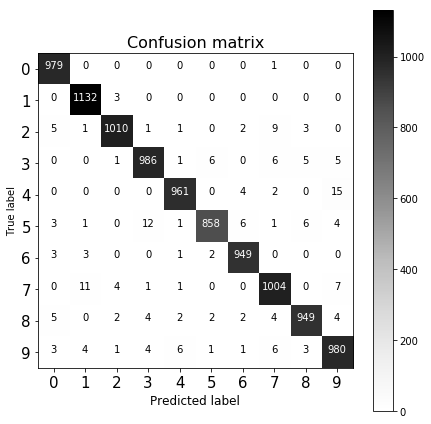

In [23]:
cnf_matrix = confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

plt.imshow(cnf_matrix, interpolation='nearest', cmap='Greys')
plt.title('Confusion matrix', fontsize=16)
plt.colorbar()

plt.xticks(np.linspace(0, 9, 10), fontsize=15)
plt.yticks(np.linspace(0, 9, 10), fontsize=15)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(np.arange(cnf_matrix.shape[0]), np.arange(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label')

plt.savefig('conf_matrix.pdf')
plt.show()

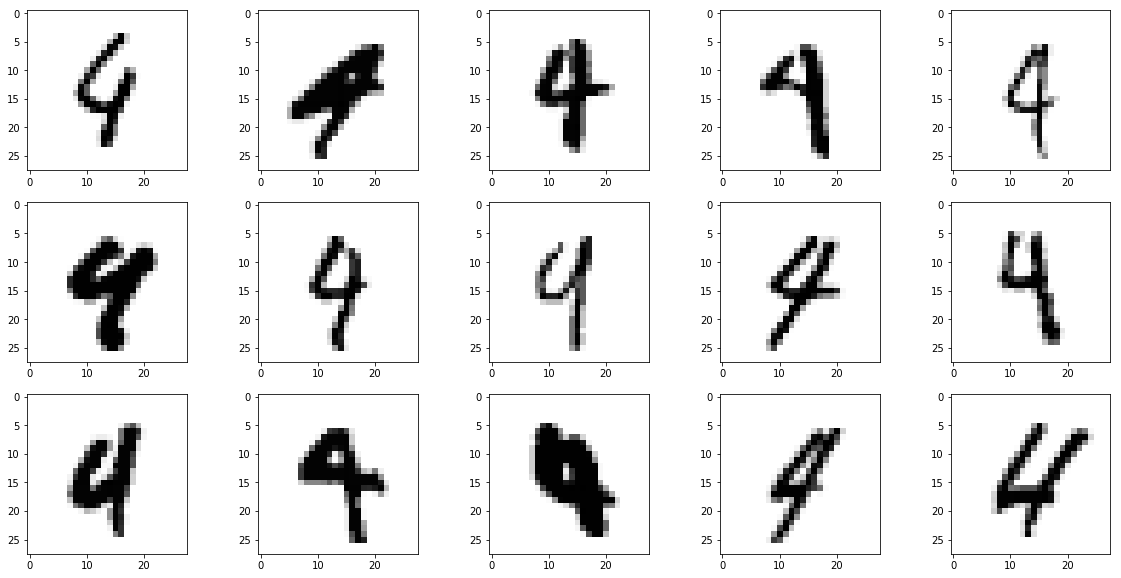

In [30]:
mask = (y_test == 4) * (y_predicted == 9)
num_of_digits = np.sum(mask)
fig, ax = plt.subplots(3, 5, figsize=(25, 5))

for i in range(num_of_digits):
    ax[i // 5, i % 5].imshow(X_test[mask][i].reshape((28, 28)), cmap='Greys')

fig.set_figwidth(20)
fig.set_figheight(10)

plt.savefig('digits_3.pdf')
plt.show()

### Эксперимент 6

In [5]:
def my_rotate(arr, angle):
    return rotate(arr.reshape((28, 28)), angle=angle)[:784].reshape(784)

In [6]:
def my_shift(arr, shift):
    return interpolation.shift(arr.reshape((28, 28)), shift=shift).reshape(784)

In [7]:
cv = cross_validation.kfold(X_train.shape[0])

In [8]:
rotations = [5, -5, 10, -10, 15, -15]

In [9]:
smooths = np.sqrt(np.array([0.5, 1, 1.5]))

In [10]:
directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
shift_amount = np.arange(3) + 1
shifts = (directions * shift_amount[:, np.newaxis, np.newaxis]).ravel().reshape(-1, 2)

In [32]:
cross_val_shifts = np.empty((len(shifts), len(cv)), dtype=float)
for shift_num, shift in enumerate(shifts):
    for split_num, split in enumerate(cv):
        my_own = KNNClassifier()
        my_own.fit(X_train[split[0]], y_train[split[0]])
        kneighbors = my_own.find_kneighbors(X_train[split[1]])

        kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_shift,
                                                                     axis=1,
                                                                     arr=X_train[split[1]],
                                                                     shift=shift))
        kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                      np.hstack((kneighbors[1], kneighbors_last[1])))
        nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
        indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
        indices = (indices[0], nearest_neighbors_pos.ravel())
        distances = kneighbors[0][indices].reshape(-1, my_own.k)
        indices = kneighbors[1][indices].reshape(-1, my_own.k)
        y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                         num_of_classes=10,
                                                         kneighbors=(distances, indices))
        cross_val_shifts[shift_num][split_num] = np.mean(y_predicted == y_train[split[1]])

In [33]:
cross_val_rotations = np.empty((len(rotations), len(cv)), dtype=float)
for rotation_num, rotation in enumerate(rotations):
    for split_num, split in enumerate(cv):
        my_own = KNNClassifier()
        my_own.fit(X_train[split[0]], y_train[split[0]])
        kneighbors = my_own.find_kneighbors(X_train[split[1]])

        kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_rotate,
                                                                     axis=1,
                                                                     arr=X_train[split[1]],
                                                                     angle=rotation))
        kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                      np.hstack((kneighbors[1], kneighbors_last[1])))
        nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
        indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
        indices = (indices[0], nearest_neighbors_pos.ravel())
        distances = kneighbors[0][indices].reshape(-1, my_own.k)
        indices = kneighbors[1][indices].reshape(-1, my_own.k)
        y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                         num_of_classes=10,
                                                         kneighbors=(distances, indices))
        cross_val_rotations[rotation_num][split_num] = np.mean(y_predicted == y_train[split[1]])

In [34]:
cross_val_gaussian = np.empty((len(smooths), len(cv)), dtype=float)
for smooth_num, smooth in enumerate(smooths):
    for split_num, split in enumerate(cv):
        my_own = KNNClassifier()
        my_own.fit(X_train[split[0]], y_train[split[0]])
        kneighbors = my_own.find_kneighbors(X_train[split[1]])

        kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=gaussian_filter,
                                                                     axis=1,
                                                                     arr=X_train[split[1]],
                                                                     sigma=smooth))
        kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                      np.hstack((kneighbors[1], kneighbors_last[1])))
        nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
        indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
        indices = (indices[0], nearest_neighbors_pos.ravel())
        distances = kneighbors[0][indices].reshape(-1, my_own.k)
        indices = kneighbors[1][indices].reshape(-1, my_own.k)
        y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                         num_of_classes=10,
                                                         kneighbors=(distances, indices))
        cross_val_gaussian[smooth_num][split_num] = np.mean(y_predicted == y_train[split[1]])

In [35]:
cross_val_baseline = cross_validation.knn_cross_val_score(X_train, y_train, k_list=[4])

In [36]:
cross_val_gaussian

array([[ 0.97280314,  0.97308458,  0.9755098 ],
       [ 0.97174744,  0.9721393 ,  0.97361056],
       [ 0.96863061,  0.97      ,  0.97181128]])

In [32]:
np.mean(cross_val_gaussian, axis=1)

array([ 0.97379917,  0.9724991 ,  0.9701473 ])

In [37]:
cross_val_shifts

array([[ 0.97612105,  0.97716418,  0.97990804],
       [ 0.97571888,  0.97636816,  0.97685926],
       [ 0.97702594,  0.97636816,  0.9790084 ],
       [ 0.97742811,  0.97487562,  0.97930828],
       [ 0.97561834,  0.97497512,  0.9770092 ],
       [ 0.9751659 ,  0.97507463,  0.97695922],
       [ 0.97617133,  0.97477612,  0.97665934],
       [ 0.97556807,  0.97557214,  0.9772591 ],
       [ 0.974814  ,  0.97442786,  0.97665934],
       [ 0.97466318,  0.97447761,  0.97660936],
       [ 0.97521617,  0.97477612,  0.97695922],
       [ 0.974814  ,  0.97467662,  0.97615954]])

In [37]:
np.mean(cross_val_shifts, axis=1)

array([ 0.97773109,  0.97631543,  0.9774675 ,  0.977204  ,  0.97586755,
        0.97573325,  0.97586893,  0.9761331 ,  0.9753004 ,  0.97525005,
        0.9756505 ,  0.97521672])

In [38]:
cross_val_rotations

array([[ 0.97275287,  0.97298507,  0.97510996],
       [ 0.9751659 ,  0.97348259,  0.97605958],
       [ 0.97240097,  0.97308458,  0.97471012],
       [ 0.97556807,  0.97368159,  0.97720912],
       [ 0.96988739,  0.97064677,  0.97291084],
       [ 0.97405992,  0.97223881,  0.97610956]])

In [34]:
np.mean(cross_val_rotations, axis=1)

array([ 0.97361597,  0.97490269,  0.97339856,  0.97548626,  0.97114833,
        0.9741361 ])

In [39]:
best_smooth = smooths[np.argmax(np.mean(cross_val_gaussian, axis=1))]
best_rotation = rotations[np.argmax(np.mean(cross_val_rotations, axis=1))]
best_shift = shifts[np.argmax(np.mean(cross_val_shifts, axis=1))]

In [40]:
best_smooth

0.7071067811865476

In [41]:
best_rotation

-10

In [42]:
best_shift

array([1, 0])

In [11]:
best_smooth = 0.7071067811865476
best_rotation = -10
best_shift = np.array([1, 0])

In [12]:
cross_val_result = np.empty(len(cv), dtype=float)
for split_num, split in enumerate(cv):
    my_own = KNNClassifier()
    my_own.fit(X_train[split[0]], y_train[split[0]])
    kneighbors = my_own.find_kneighbors(X_train[split[1]])

    kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_rotate,
                                                                 axis=1,
                                                                 arr=X_train[split[1]],
                                                                 angle=best_rotation))
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))

    kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_shift,
                                                                 axis=1,
                                                                 arr=X_train[split[1]],
                                                                 shift=best_shift))
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))

    nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
    indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
    indices = (indices[0], nearest_neighbors_pos.ravel())
    distances = kneighbors[0][indices].reshape(-1, my_own.k)
    indices = kneighbors[1][indices].reshape(-1, my_own.k)
    y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                     num_of_classes=10,
                                                     kneighbors=(distances, indices))
    cross_val_result[split_num] = np.mean(y_predicted == y_train[split[1]])

In [13]:
cross_val_result

array([ 0.97746776,  0.97864222,  0.97546876])

#### Теперь обучимся и сделаем предсказание на тестовой выборке

In [39]:
good_shifts = shifts[np.mean(cross_val_shifts, axis=1) > cross_val_baseline]

In [44]:
good_shifts

array([[ 1,  0],
       [ 0,  1],
       [-1,  0],
       [ 0, -1],
       [ 2,  0],
       [ 0,  2],
       [-2,  0],
       [ 0, -2],
       [-3,  0]])

In [49]:
my_own = KNNClassifier()
my_own.fit(X_train, y_train)
kneighbors = my_own.find_kneighbors(X_test)
for shift in good_shifts:
    kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_shift,
                                                                 axis=1,
                                                                 arr=X_test,
                                                                 shift=shift))
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))

nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
indices = (indices[0], nearest_neighbors_pos.ravel())
distances = kneighbors[0][indices].reshape(-1, my_own.k)
indices = kneighbors[1][indices].reshape(-1, my_own.k)
y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                 num_of_classes=10,
                                                 kneighbors=(distances, indices))
final_accuracy_1 = np.mean(y_predicted == y_test)

In [50]:
final_accuracy_1

0.98040000000000005

In [54]:
my_own = KNNClassifier()
my_own.fit(X_train, y_train)
kneighbors = my_own.find_kneighbors(X_test)
for shift in good_shifts:
    kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_shift,
                                                                 axis=1,
                                                                 arr=X_test,
                                                                 shift=shift))
    kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
                  np.hstack((kneighbors[1], kneighbors_last[1])))
    
kneighbors_last = my_own.find_kneighbors(np.apply_along_axis(func1d=my_rotate,
                                                             axis=1,
                                                             arr=X_test,
                                                             angle=best_rotation))
kneighbors = (np.hstack((kneighbors[0], kneighbors_last[0])),
              np.hstack((kneighbors[1], kneighbors_last[1])))

nearest_neighbors_pos = np.argpartition(kneighbors[0], np.arange(my_own.k), axis=1)[:, :my_own.k]
indices = np.where((nearest_neighbors_pos == nearest_neighbors_pos))
indices = (indices[0], nearest_neighbors_pos.ravel())
distances = kneighbors[0][indices].reshape(-1, my_own.k)
indices = kneighbors[1][indices].reshape(-1, my_own.k)
y_predicted = cross_validation.cross_val_predict(knn_classifier=my_own,
                                                 num_of_classes=10,
                                                 kneighbors=(distances, indices))
final_accuracy_2 = np.mean(y_predicted == y_test)

In [47]:
final_accuracy_2

0.98160000000000003

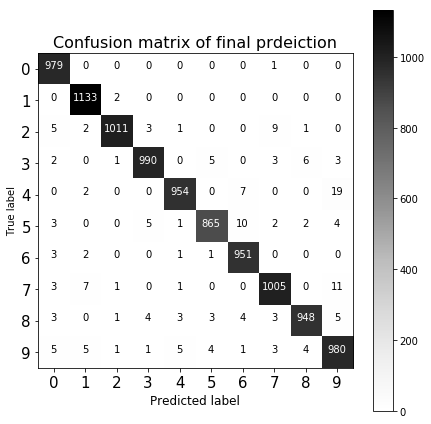

In [57]:
cnf_matrix = confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

plt.imshow(cnf_matrix, interpolation='nearest', cmap='Greys')
plt.title('Confusion matrix of final prdeiction', fontsize=16)
plt.colorbar()

plt.xticks(np.linspace(0, 9, 10), fontsize=15)
plt.yticks(np.linspace(0, 9, 10), fontsize=15)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(np.arange(cnf_matrix.shape[0]), np.arange(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label')

plt.savefig('conf_matrix_3.pdf')
plt.show()

#### Плюсы подхода, основанного на проеобразовании объектов тестовой выборки:
- Так как тестовая выборка намного меньше обучающей, засчёт чего экономится память
- Так как часто плохо классифицируются именно объекты, имеющие деффекты, можно попытаться исправить эти деффекты с помощью различных преобразований, а не делать обучающую выборку деффектной и ожидать, что сильно улучшится качество